In [216]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np


## colores 


In [217]:
two_colors = ['#e5383b','#7b2cbf']

# procesando los datos

In [218]:
df = pd.read_csv('/home/sebasgrande/DocumentosSebas/platzi/Data_scientis/projects/hearth_attack_project/heart.csv')

In [219]:
df_text = df.copy()
df_text['sex'] = df_text['sex'].replace([0,1],['female','male'])
df_text['cp'] = df_text['cp'].replace([1,2,3,4],['ang','no_ang','no_pain','asymp'])
df_text['exng'] = df_text['exng'].replace([0,1],['no','yes'])
df_text['output'] = df_text['output'].replace([0,1],['less_chance','more_chance'])

In [220]:
df_text

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,male,no_pain,145,233,1,0,150,no,2.3,0,0,1,more_chance
1,37,male,no_ang,130,250,0,1,187,no,3.5,0,0,2,more_chance
2,41,female,ang,130,204,0,0,172,no,1.4,2,0,2,more_chance
3,56,male,ang,120,236,0,1,178,no,0.8,2,0,2,more_chance
4,57,female,0,120,354,0,1,163,yes,0.6,2,0,2,more_chance
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,female,0,140,241,0,1,123,yes,0.2,1,0,3,less_chance
299,45,male,no_pain,110,264,0,1,132,no,1.2,1,0,3,less_chance
300,68,male,0,144,193,1,1,141,no,3.4,1,2,3,less_chance
301,57,male,0,130,131,0,1,115,yes,1.2,1,1,3,less_chance


In [221]:
df.shape

(303, 14)

In [222]:
df.drop_duplicates()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [223]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


## Nuestro output es 

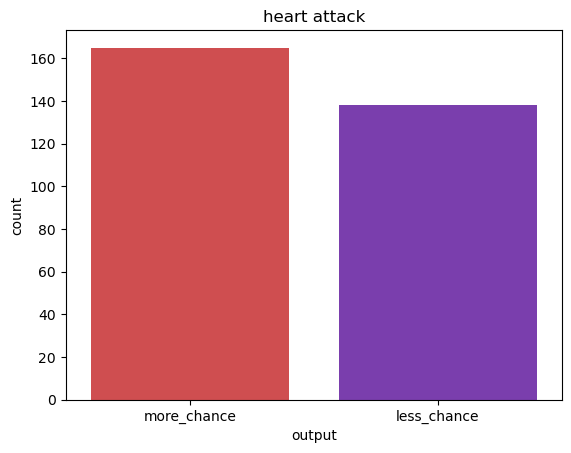

In [224]:
sns.countplot(data=df_text,x='output',palette=two_colors)
plt.title('heart attack')
plt.show()

# EDA

In [225]:
my_variables = {}

for i in list(df.columns):
    my_variables[i] = df[i].value_counts().shape[0]

pd.DataFrame(my_variables,index=['unique'])

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
unique,41,2,4,49,152,2,3,91,2,40,3,5,4,2


In [226]:
#funcion para graficar los conteos
def countplots(feature):
    sns.countplot(data=df_text,x=feature,hue='output',palette=two_colors)
    plt.title(f'conteo de {feature}')
    plt.show()

In [227]:
#funcion para los histplots coloridos
def colorplot(feature):
    sns.histplot(data=df,x=feature,hue='output',palette=two_colors,kde=True)
    plt.title(f'distribución de {feature}')
    plt.show()

In [228]:
df_loop = df_text.copy()
df_loop.drop(['age','sex'],axis=1,inplace=True)

string_col = df_loop.select_dtypes(include="object").columns
#string_col = ['cp','exng','output']
df_loop[string_col]=df_loop[string_col].astype("string")

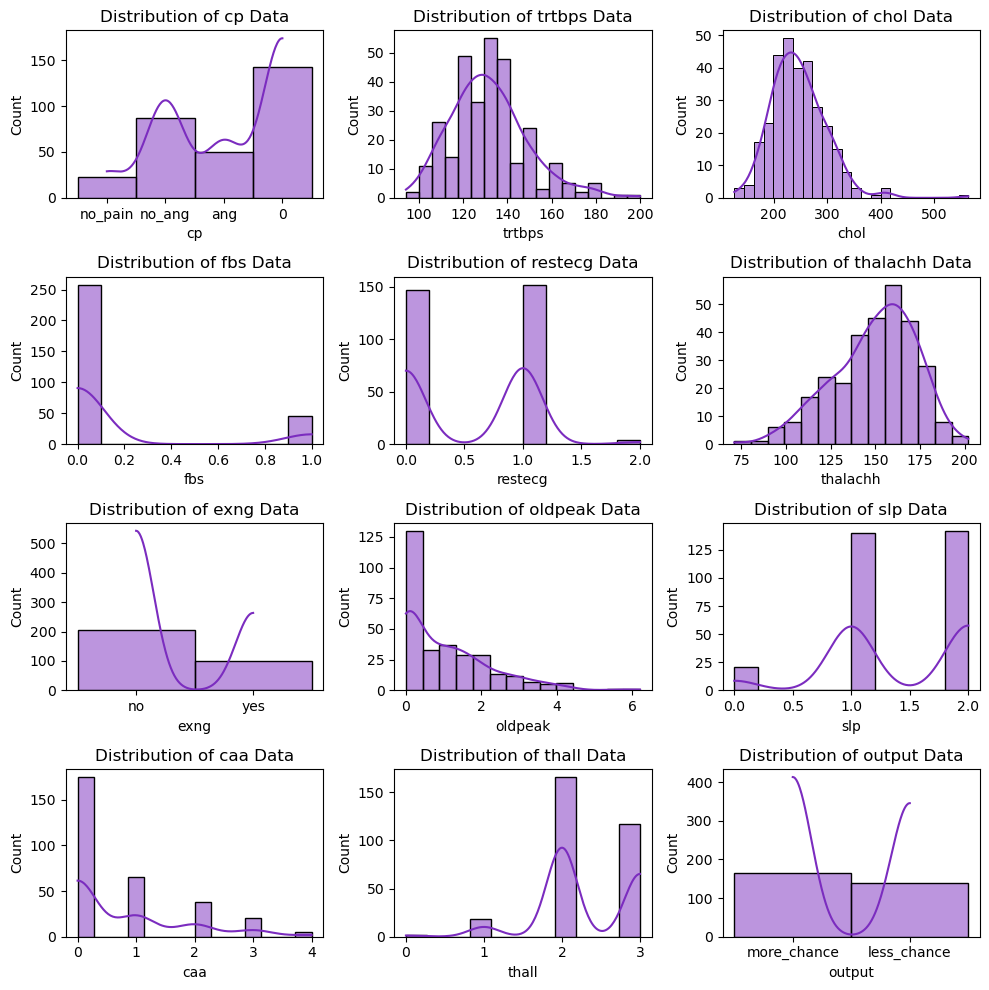

In [229]:

plt.figure(figsize=(10,10))
for i,col in enumerate(df_loop.columns,1):
    plt.subplot(4,3,i)
    plt.title(f"Distribution of {col} Data")
    sns.histplot(df_loop[col],kde=True,color='#7b2cbf')
    plt.tight_layout()
    plt.plot()
    
    

## Distribuciones por target

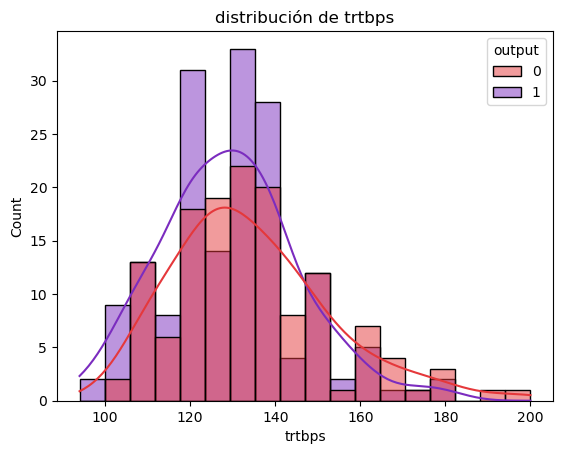

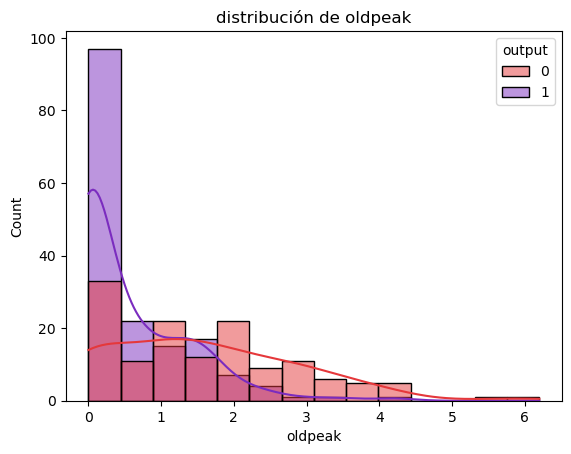

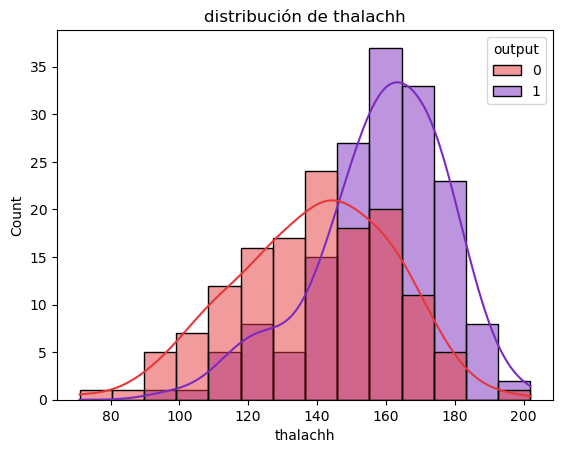

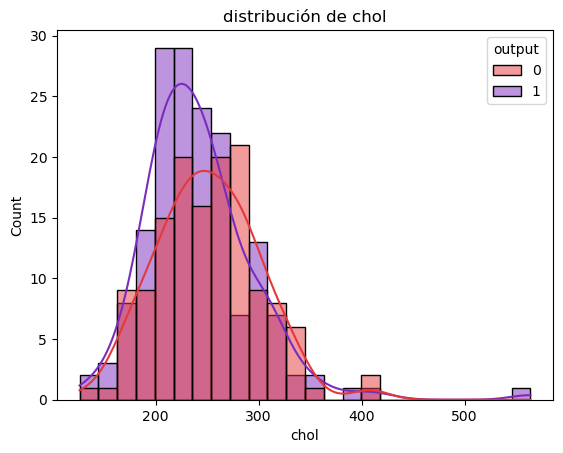

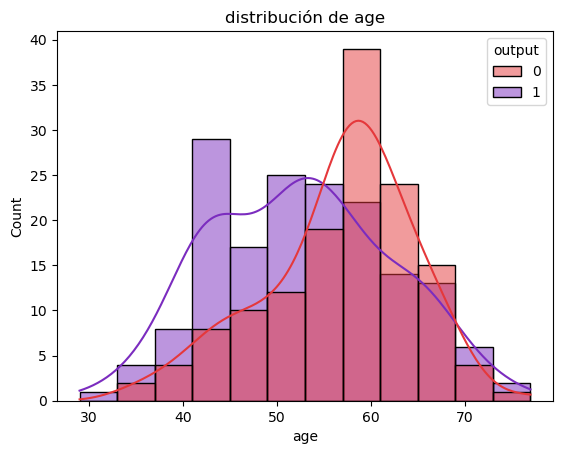

In [230]:
col_features = ['trtbps','oldpeak','thalachh','chol','age']
for i in col_features:
    colorplot(i)

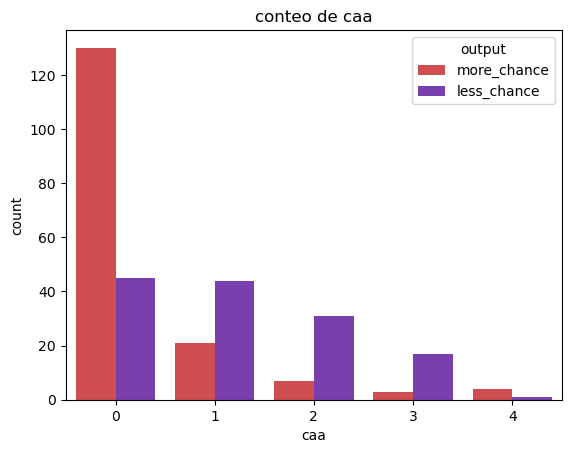

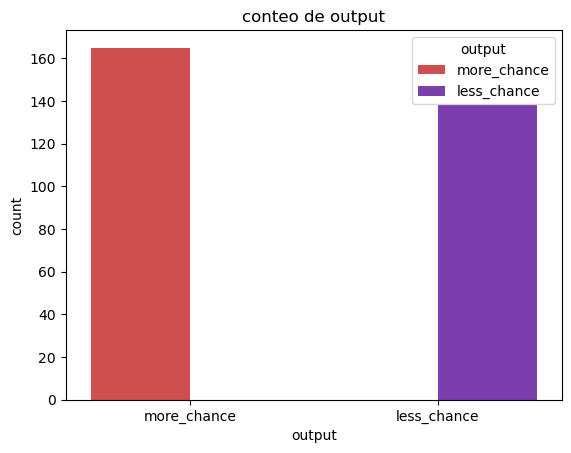

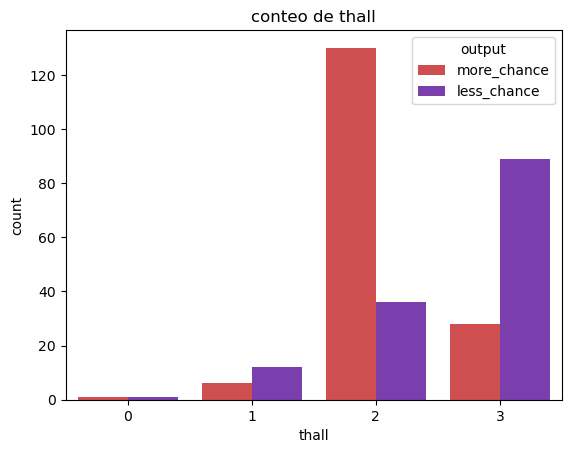

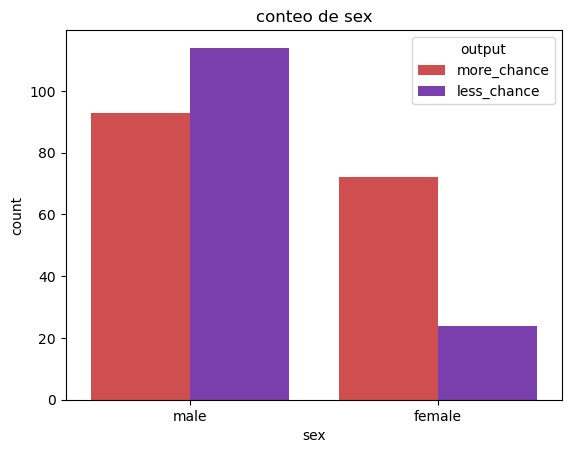

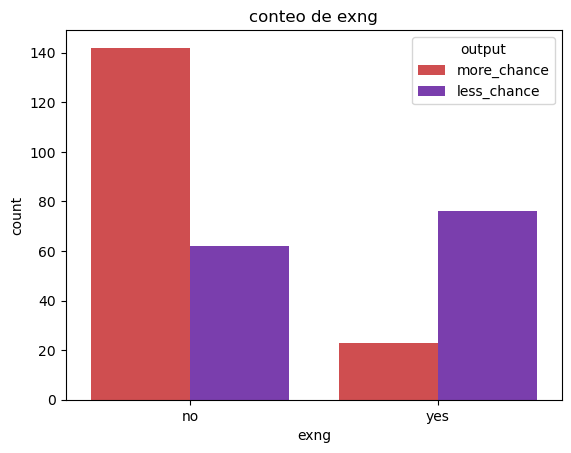

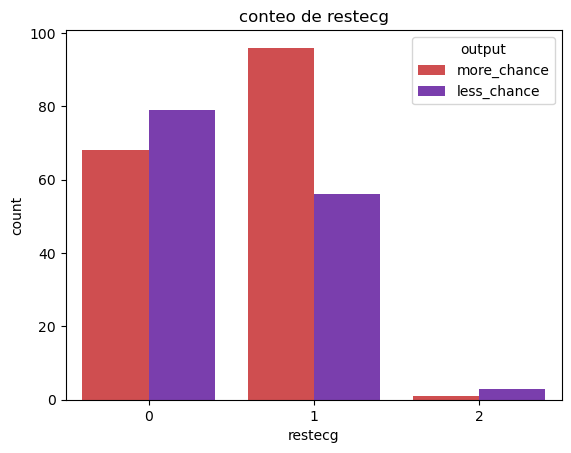

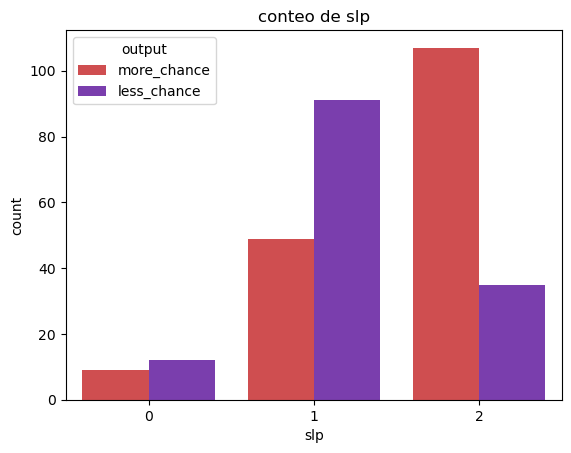

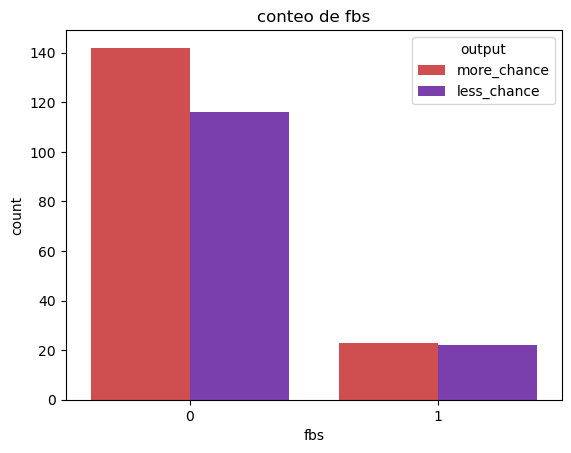

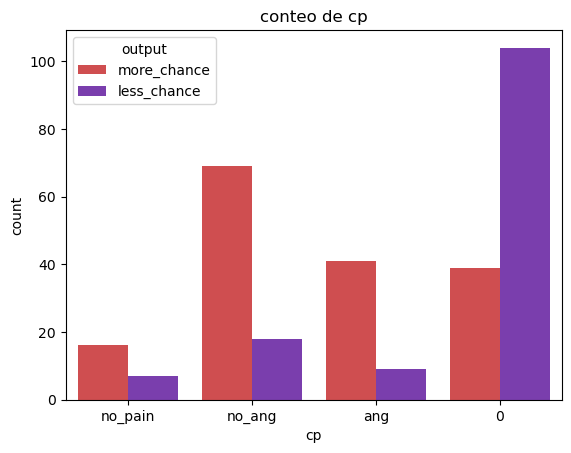

In [231]:
cols = set(df_text.columns)-set(col_features)
for i in cols:
    countplots(i)

## heatmap

<AxesSubplot: >

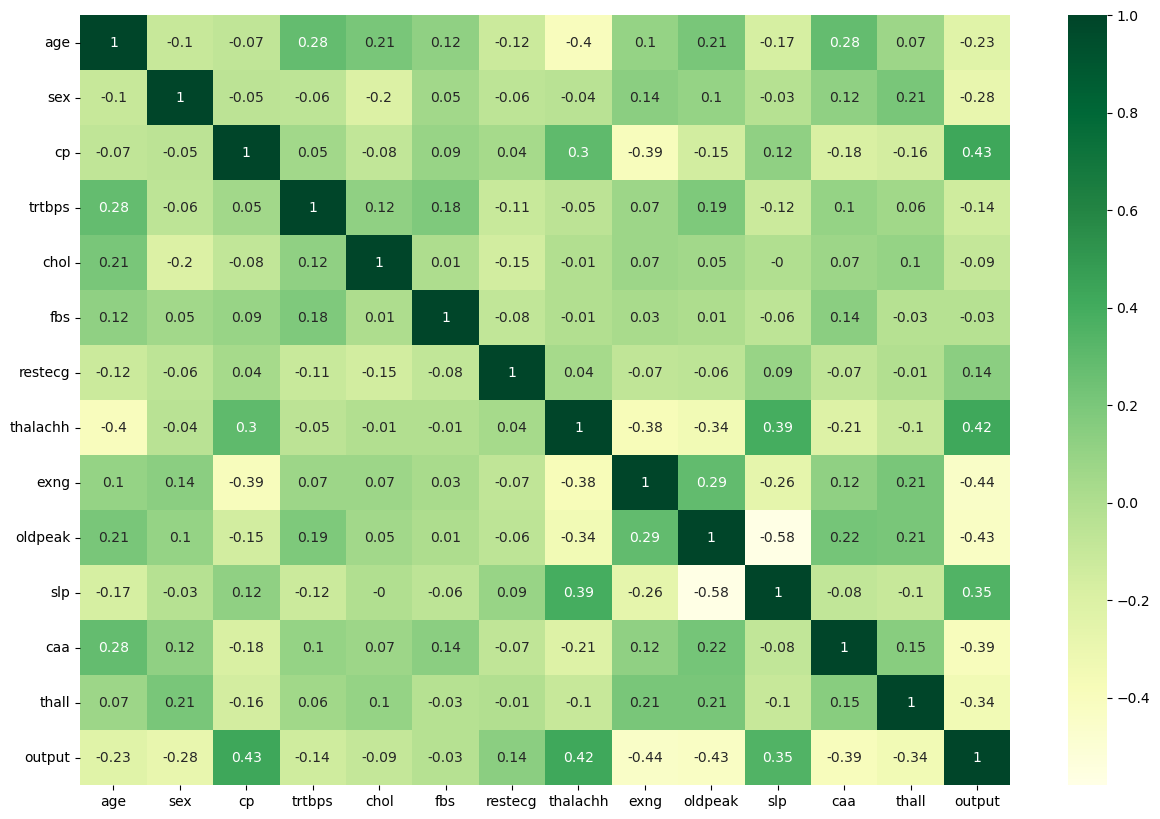

In [232]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr().round(2),cmap="YlGn",annot=True)

# Regresion lineal

In [233]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn import metrics

In [234]:
mieux_vars = ['oldpeak','exng','thalachh','cp','caa','thall']

In [235]:
x = df[mieux_vars]
y = df['output']

## train and test

In [236]:
x_train,x_test,y_train,y_test = train_test_split(x,y,shuffle=True,test_size=0.3)

In [237]:
print('xtrain',x_train.shape,'xtest',x_test.shape)
print('ytrain',y_train.shape,'ytest',y_test.shape)

xtrain (212, 6) xtest (91, 6)
ytrain (212,) ytest (91,)


## minmax

In [240]:
scaler = MinMaxScaler()

In [241]:
scaler.fit_transform(x_train)
scaler.transform(x_test)

array([[0.41935484, 0.        , 0.4351145 , 0.        , 0.        ,
        1.        ],
       [0.16129032, 0.        , 0.14503817, 0.        , 0.5       ,
        0.33333333],
       [0.        , 0.        , 0.8778626 , 0.        , 0.        ,
        0.66666667],
       [0.22580645, 1.        , 0.55725191, 0.        , 0.25      ,
        1.        ],
       [0.41935484, 0.        , 0.32824427, 1.        , 0.        ,
        0.66666667],
       [0.12903226, 1.        , 0.5648855 , 0.        , 0.25      ,
        1.        ],
       [0.        , 0.        , 0.70229008, 0.66666667, 0.25      ,
        0.66666667],
       [0.        , 1.        , 0.63358779, 0.        , 0.        ,
        0.66666667],
       [0.37096774, 0.        , 0.51145038, 0.        , 0.        ,
        0.33333333],
       [0.06451613, 0.        , 0.69465649, 0.33333333, 0.5       ,
        0.66666667],
       [0.20967742, 0.        , 0.6259542 , 0.33333333, 0.        ,
        0.66666667],
       [0.19354839, 0